In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn import datasets, neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [13]:
file = "data_gk_2019.csv"
# load dataset into Pandas DataFrame

all = pd.read_csv(file)
all

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,AvgLen,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,1,Jeff Attinella\Jeff-Attinella,us USA,GK,Portland,30,1988,10,10,900,...,40.2,96,77.1,54.3,97,8,8.2,3,0.30,13.3
1,2,Joe Bendik\Joe-Bendik,us USA,GK,Columbus,29,1989,6,6,540,...,37.9,52,46.2,48.6,40,4,10.0,2,0.33,14.5
2,3,David Bingham\David-Bingham,us USA,GK,LA Galaxy,29,1989,33,33,2970,...,44.2,326,72.7,55.8,296,31,10.5,11,0.33,13.2
3,4,Andre Blake\Andre-Blake,jm JAM,GK,Philadelphia,28,1990,26,26,2304,...,37.8,182,66.5,51.1,203,10,4.9,16,0.63,13.9
4,5,Alex Bono\Alex-Bono,us USA,GK,Toronto FC,24,1994,7,6,555,...,36.0,44,61.4,47.7,44,5,11.4,7,1.14,16.3
5,6,Evan Bush\Evan-Bush,us USA,GK,Montreal,32,1986,32,32,2880,...,38.7,219,68.0,50.8,208,20,9.6,21,0.66,14.7
6,7,Steve Clark\Steve-Clark,us USA,GK,Portland,32,1986,24,24,2160,...,35.7,216,68.1,51.3,277,22,7.9,10,0.42,14.0
7,8,Carlos Coronel\Carlos-Coronel,br BRA,GK,Philadelphia,22,1996,4,3,319,...,42.4,23,100.0,65.0,36,5,13.9,1,0.28,11.0
8,9,Maxime Crépeau\Maxime-Crepeau,ca CAN,GK,Vancouver,24,1994,26,26,2340,...,38.4,311,60.1,48.8,367,30,8.2,12,0.46,11.2
9,10,Cody Cropper\Cody-Cropper,us USA,GK,New England,25,1993,7,7,630,...,37.0,52,76.9,55.3,47,1,2.1,12,1.71,16.5


In [33]:
players = all[all.Min > 500]
players = players.reset_index()
player_names = pd.DataFrame(players['Player'])
players = players.drop(['Player','Rk','Nation', 'Pos', 'Age', 'Born', 'MP', 'Starts', 'Min', 'Squad', 'W', 'D', 'L', 'CS', 'CS%'], axis=1)
players.head()

,index,GA,GA90,SoTA,Saves,Save%,PKatt,PKA,PKsv,PKm,...,AvgLen,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,0,24,2.40,60,38,0.650,3,3,0,0,...,40.2,96,77.1,54.3,97,8,8.2,3,0.30,13.3
1,1,12,2.00,25,13,0.560,1,1,0,0,...,37.9,52,46.2,48.6,40,4,10.0,2,0.33,14.5
2,2,55,1.67,183,136,0.732,8,6,2,0,...,44.2,326,72.7,55.8,296,31,10.5,11,0.33,13.2
3,3,41,1.60,95,59,0.600,4,3,1,0,...,37.8,182,66.5,51.1,203,10,4.9,16,0.63,13.9
4,4,11,1.78,22,14,0.636,3,3,0,0,...,36.0,44,61.4,47.7,44,5,11.4,7,1.14,16.3


In [34]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(players.values)
players.shape

(36, 34)

In [35]:
sklearn_pca = PCA(n_components=2)

players_values = np.nan_to_num(players)
reduced_data = sklearn_pca.fit_transform(players_values)

print(players.shape)
print(reduced_data.shape)

(36, 34)
(36, 2)


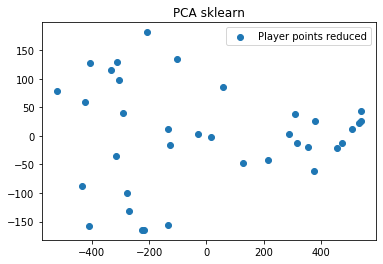

In [36]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Player points reduced')
plt.title("PCA sklearn")
plt.legend()
plt.show()

[[-245.4879078     2.1688772 ]
 [ 385.76671225   -3.4082356 ]]
[1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0.]


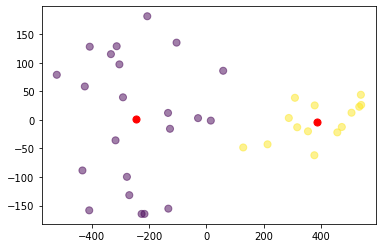

In [37]:
df = pd.DataFrame(reduced_data,columns=['x','y'])

kmeans = KMeans(n_clusters=2).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
print( kmeans.labels_.astype(float))

plt.scatter(df['x'], df['y'], c = kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [38]:
clusters = pd.DataFrame(kmeans.labels_)
player_names["cluster"] = clusters
player_names.to_csv("groupings_gk_2019.csv")